# **Exploration**

## **🛠️ Pré-requis techniques**

In [83]:
import os
import cv2
import matplotlib.pyplot as plt

## **🕵️ Données et Préparation (Le "Tiling")**

In [84]:
img_path = 'data/train/655_sat.jpg'
mask_path = 'data/train/655_mask.png'

img = cv2.imread(img_path)
mask = cv2.imread(mask_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image :",img.shape, "| Mask :", mask.shape)

Image : (1024, 1024, 3) | Mask : (1024, 1024, 3)


### **Visualisation d'une paire**

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

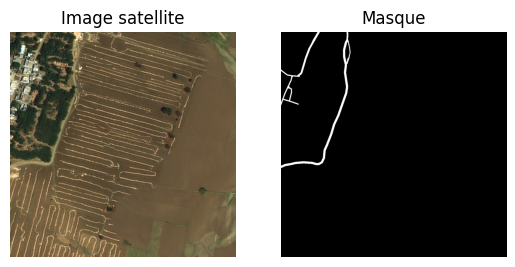

In [85]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image satellite")
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.title("Masque")
plt.axis(False)

## **🏗️ L'Architecture U-Net**

### Importer le Dataset

In [86]:
from src.dataset import RoadDataset

In [87]:
train_path = 'data/train'
dataset = RoadDataset(train_path)
img, mask = dataset[0]
print("Image :", img.shape, '| Mask :', mask.shape)

Image : torch.Size([3, 256, 256]) | Mask : torch.Size([1, 256, 256])


### **Test du modèle**

In [88]:
from src.model import get_model

UNet = get_model()
img_output = img.unsqueeze(0)
img_model = UNet(img_output)
print("Image :", img_model.shape)

Image : torch.Size([1, 1, 256, 256])


## **🚀 L'Entraînement (Training)**

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
from torchvision import transforms

In [90]:
print(f"Est-ce que CUDA (GPU) est dispo ? {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Nom de la carte : {torch.cuda.get_device_name(0)}")

Est-ce que CUDA (GPU) est dispo ? True
Nom de la carte : NVIDIA GeForce GTX 1650


### **Hyper-paramètres**

In [91]:
# Hyper-paramètres
LEARNING_RATE = 1e-4
BATCH_SIZE = 8
NUM_EPOCHS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


In [92]:
UNet = UNet.to(DEVICE)

# Loss + Optimiseur
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(UNet.parameters(), lr=LEARNING_RATE)

train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [93]:
UNet.train()

loss_history = []
best_loss = float('inf')

for epoch in range(NUM_EPOCHS):
    loop = tqdm(train_loader)
    loss_epoch = []
    for batch_idx, (img, mask) in enumerate(loop):
        img = img.to(DEVICE)
        mask = mask.to(DEVICE)

        optimizer.zero_grad()

        outputs = UNet(img)
        
        loss = criterion(outputs, mask)
        loss.backward()

        optimizer.step()

        loss_epoch.append(loss.item())

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} : Loss =", loss.item())
    loss_history.append(np.mean(loss_epoch))

    # Sauvegarde des poids
    if np.mean(loss_epoch) <= best_loss:
        best_loss = np.mean(loss_epoch)
        torch.save(UNet.state_dict(), "UNet.pth")


# Création du graphique
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('Progression de l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()
plt.savefig("courbe_loss.png") # On sauvegarde l'image
print("Graphique sauvegardé sous 'courbe_loss.png' 📈")
plt.show()

  1%|▏         | 11/779 [00:07<08:15,  1.55it/s]


KeyboardInterrupt: 

### **Chargement des poids**

In [ ]:
# Initialisation du model
model = get_model().to(DEVICE)

# Chargement des poids
weights = torch.load("UNet_20.pth")

# Charger les poids dans le model
model.load_state_dict(weights)

# Passer le model en évaluation
model.eval()

C:\Users\natha\AppData\Local\Temp\ipykernel_24460\2107157308.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load("UNet_20.pth")


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

## **Prédictions**

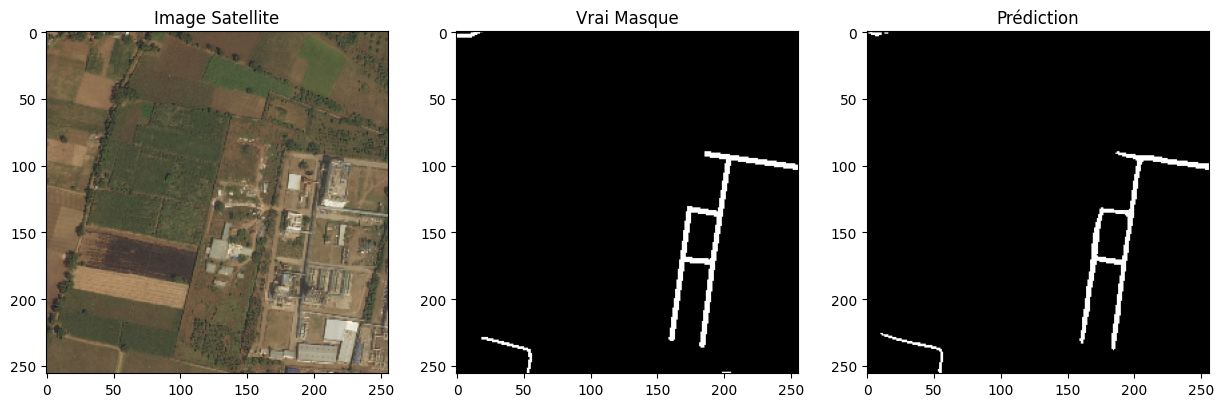

In [97]:
data_iter = iter(train_loader)
images, masks = next(data_iter)

images = images.to(DEVICE)

with torch.no_grad():
    prediction = model(images)
    prediction = torch.sigmoid(prediction)
    prediction = (prediction > 0.5).float()

img_show = images[0].cpu().permute(1, 2, 0)
mask_show = masks[0].cpu().permute(1, 2, 0)
pred_show = prediction[0].cpu().permute(1, 2, 0)

# Affichage
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_show)
ax[0].set_title("Image Satellite")
ax[1].imshow(mask_show, cmap="gray")
ax[1].set_title("Vrai Masque")
ax[2].imshow(pred_show, cmap="gray")
ax[2].set_title("Prédiction")
plt.show()


# **Évaluer qualité modèle**

### **Calcul score IoU**

In [98]:
# mask_show et pred_show
mask = mask_show.numpy()
pred = pred_show.numpy()

intersection = np.sum(mask * pred)
union = (np.sum(pred) + np.sum(mask)) - intersection
score_iou = intersection/union
print("Score IoU = ", score_iou)

Score IoU =  0.8074499


## **Test avec nouvelle image**

In [ ]:
# new_img = cv2.imread('data/test/49607_sat.jpg')
new_img = cv2.imread('Test_image.jpg')
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
new_img = cv2.resize(new_img, (256, 256))
new_img2 = new_img.astype('float32')/255.0
new_img2 = new_img2.transpose(2, 0, 1)
new_img_tensor = torch.tensor(new_img2)
new_img_tensor = new_img_tensor.unsqueeze(0).to(DEVICE)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

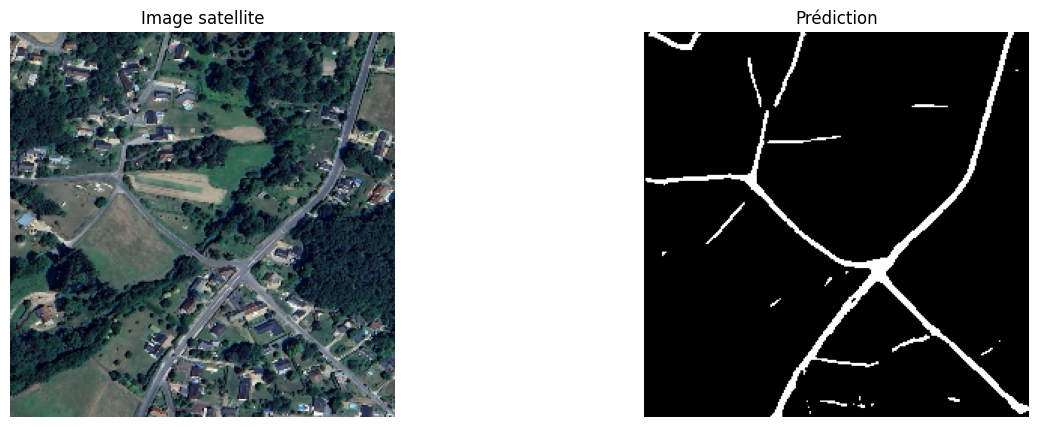

In [ ]:
with torch.no_grad():
    pred = model(new_img_tensor)
    pred = torch.sigmoid(pred)
    pred = (pred > 0.5).float()

    mask_final = pred.cpu().squeeze(0).squeeze(0).numpy()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(new_img)
ax[0].set_title("Image satellite")
ax[0].axis(False)
ax[1].imshow(mask_final, cmap='gray')
ax[1].set_title("Prédiction")
ax[1].axis(False)

## **Morphologie pour améliorer**

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

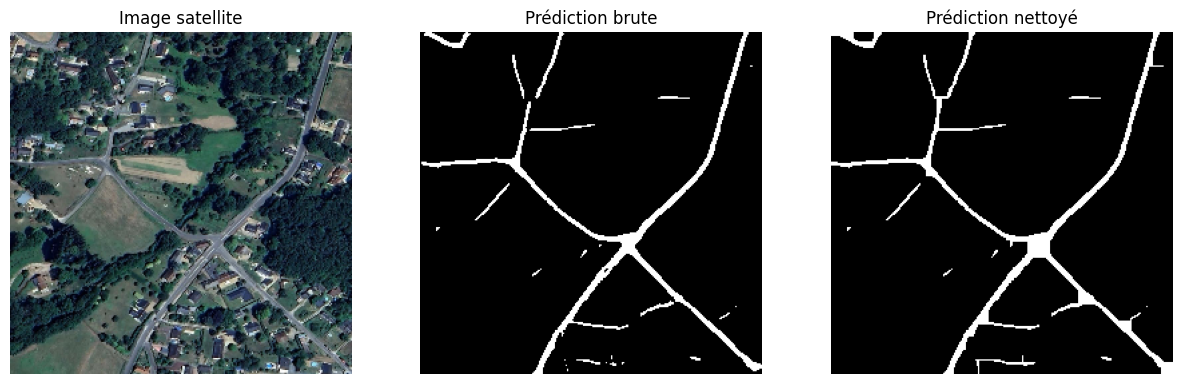

In [ ]:
# Élément structurant
elt = cv2.getStructuringElement(0,(9, 9))

# Fermeture sur le mask
mask_closed = cv2.morphologyEx(mask_final, cv2.MORPH_CLOSE, elt)

# Affichage
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(new_img)
ax[0].set_title("Image satellite")
ax[0].axis(False)
ax[1].imshow(mask_final, cmap='gray')
ax[1].set_title("Prédiction brute")
ax[1].axis(False)
ax[2].imshow(mask_closed, cmap='gray')
ax[2].set_title("Prédiction nettoyé")
ax[2].axis(False)

### Calcul des aires pour effacer les parasites

In [ ]:
# Convertir masque en entiers
mask_uint8 = (mask_closed*255).astype('uint8')

# Récupère stats des éléments connectés
nb_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask_uint8)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

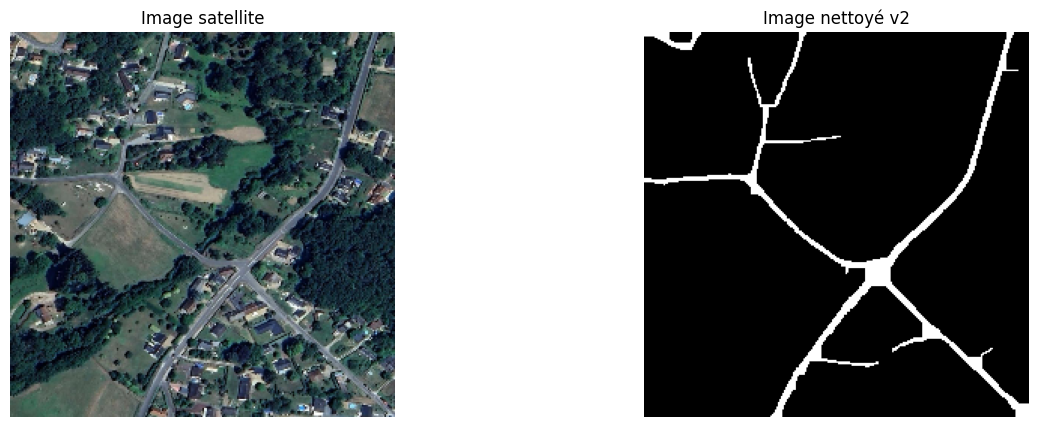

In [ ]:
seuil = 0.05*np.max(stats[1:, 4])

# 1. Créer image noire
mask_filtered = np.zeros_like(mask_final)

# 2. Parcourt chaque objet
for i in range(1, nb_labels):
    if stats[i, 4] > seuil :
        mask_filtered[labels == i] = 255

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(new_img)
ax[0].set_title("Image satellite")
ax[0].axis(False)
ax[1].imshow(mask_filtered, cmap='gray')
ax[1].set_title("Image nettoyé v2")
ax[1].axis(False)